<a href="https://colab.research.google.com/github/JhonathanOrtiz/OpenCV-python/blob/master/Sorting_shapes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
import cv2 
from google.colab.patches import cv2_imshow
import numpy as np

In [0]:
files.upload()

Saving unnamed.jpg to unnamed.jpg


{'unnamed.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x03\x02\x02\x08\t\x05\t\x06\x06\x07\x06\t\x06\t\x06\x06\x08\x06\x06\x08\x05\x08\x06\x07\x06\x06\x06\x08\x06\x08\x06\x08\x08\x08\x08\x06\x06\x06\x06\x06\x08\x08\x06\x08\x06\n\x06\x08\x08\x08\t\t\t\x08\x08\x0b\r\n\x08\r\x08\x08\t\x08\x01\x03\x04\x04\x06\x05\x06\x08\x06\x06\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\xff\xc0\x00\x11\x08\x01\x81\x02\x00\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x01\x01\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x06\x08\x05\x07\t\x04\x03\x02\xff\xc4\x00R\x10\x00\x02\x02\x01\x01\x03\x05\x07\r\x0e\x05\x03\x04\x03\x00\x00\x00\x01\x02\x03\x04\x11\x05\x12!\x06\x07\x08\x131\x16\x18"2AT\x94\t\x1456QRaq\x81\xb3\xd2\xd3\xd4\x15\x19#BSrtu\x91\x92\x93\

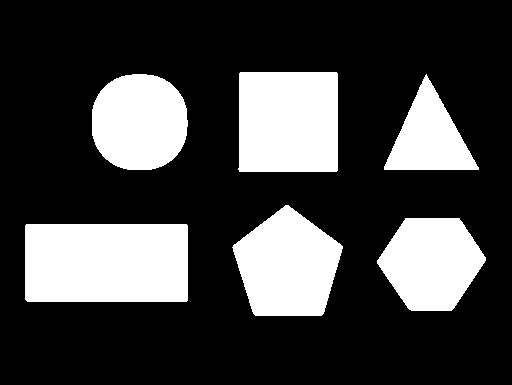

In [112]:
#Reading image
image = cv2.imread('unnamed.jpg')

#Preprocessing images
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #Conver to gray-scale image
blurr = cv2.GaussianBlur(gray, (5,5), 0) #Remove high-frecuency noise
thre = cv2.threshold(blurr, 220, 255, cv2.THRESH_BINARY)[1] # Convert to binary image
mask = cv2.bitwise_not(thre) #Apply not to convert shapes to white and background to blacj

#Show image
cv2_imshow(mask)

In [0]:
def sort_contours(contours, method='left-to-right'):
  reverse = False
  index = 0

  if method == 'right-to-left' or method == 'bottom-to-top':
    reverse = True

  if method == 'bottom-to-top' or method == 'top-to-bottom':
    index = 1

  boundingBoxes = [cv2.boundingRect(c) for c in contours]
  (contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes), key=lambda b:b[1][i], reverse=reverse))

  return (contours, boundingBoxes)

In [0]:
def draw_contour(image, cont, i):
  M = cv2.moments(cont)
  if M['m00'] !=0 and M['m01'] !=0 and M['m10'] !=0:

    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])

    text = '# {}'.format(i+1)
    cv2.putText(image, text,(cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,0))
  
  return image

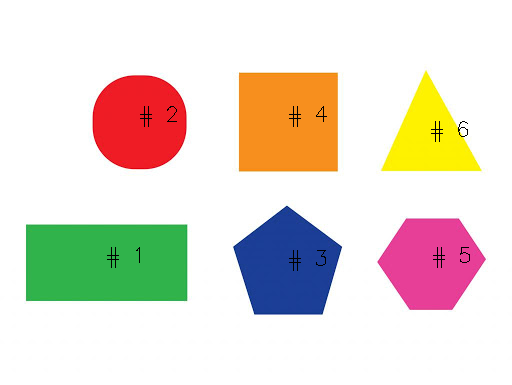

In [116]:
#detect edges on image
cannied = cv2.Canny(mask, 5, 10)

#Find contours
c, _ = cv2.findContours(cannied, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Sorting contours
contn, bb = sort_contours(contours=c, method='top-to-bottom')

#Drawing sort
for index, cont in enumerate(contn):
  
  image = draw_contour(image, cont, index)

cv2_imshow(image)